In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
import seaborn as sns
# special matplotlib argument for improved plots
#from matplotlib import rcParams
#sns.set_style("whitegrid")
#sns.set_context("poster")

In [3]:
import os
import commands

## Topology

The network topology is as shown in the following figure.

The traffic load consists of 2 flows (node 0 to 4, node 1 to 5). Each service requires 2 distinct network functions.

#### Cost structure:

For each node $i$, the unit processing cost is $c_{i} = 1$. The allocation cost of processing resource is $w_{i} = [0, 1, 3, 6, 10]$, where $w_{i,k}$ is the cost of allocating $k$ resources. The processing capacity is given by $C_{i} = [0, 1, 2, 3, 4]$.

For each link $(i,j)$, the unit transmission cost is $c_{ij} = 1$. The allocation cost of the transmission link is $w_{ji} = [0, 1, 3, 6, 10]$, where $w_{ij,k}$ is the cost of allocating $k$ resources. The capacity is given by $C_{i} = [0, 1, 2, 3, 4]$.

#### Input traffic:

Each flow has arrival rate of 2 packets/slot.

(Note that each node and each link has the maximum processing/transmission capacity up to 4 packets/slot, we maay consider this scenario as 50% workload)

(0.1, 0.9)

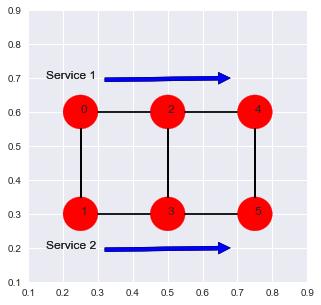

In [4]:
plt.figure(figsize=(5,5))
ax = plt.gca()
for i in xrange(2):
    for j in xrange(3):
        circle = plt.Circle((0.25*(j+1), 0.3*(i+1)), 0.05, color='r')
        ax.add_artist(circle)
        ax.annotate(str((1-i)+2*j), (0.25*(j+1), 0.3*(i+1)))
        plt.plot([0.25*(j+1), 0.25*(j+1)], [0.35, 0.55], color='k')
    plt.plot([0.3, 0.45], [0.3*(i+1), 0.3*(i+1)], color='k')
    plt.plot([0.55, 0.7], [0.3*(i+1), 0.3*(i+1)], color='k')
    ax.annotate('Service 1', xy=(0.7, 0.7), xytext=(0.15, 0.7), arrowprops=dict(facecolor='blue', shrink=0.05))
    ax.annotate('Service 2', xy=(0.7, 0.2), xytext=(0.15, 0.2), arrowprops=dict(facecolor='blue', shrink=0.05))
plt.xlim((0.1,0.9))
plt.ylim((0.1,0.9))

In [32]:
# Run simulation and plot simulation statistics
def test(N, t, deltar, policy, V):
    output_dir = 'output/sim/'
    sim_command = './test t=' + str(t) + ' deltar=' + str(deltar) + ' policy=' + policy + ' V=' + str(V) + ' logging=false'
    sim_instance = 'N_' + str(N) + '_t_' + str(t) + '_deltar_' + str(deltar) + '_' + policy + '_V_' + str(V)

    commands.getstatusoutput(sim_command)    
    
    schedule = pd.DataFrame.from_csv(output_dir + 'schedule_' + sim_instance + '.csv')
    queue = pd.DataFrame.from_csv(output_dir + 'queue_' + sim_instance + '.csv')
    cost = pd.DataFrame.from_csv(output_dir + 'cost_' + sim_instance + '.csv')
    
    node_rate_columns = schedule.columns[[('rate' in x and 'node' in x) for x in schedule.columns]]
    link_rate_columns = schedule.columns[[('rate' in x and 'link' in x) for x in schedule.columns]]

    #plt.figure()
    #schedule[node_rate_columns].head(1000).plot()
    
    plt.figure()
    fig, axes = plt.subplots(1, 3, figsize=(15, 5));
    schedule[node_rate_columns].mean().plot(kind='bar', ylim=[0,4], ax=axes[0])
    plt.title('V = ' + str(V))
    
    schedule[link_rate_columns].mean().plot(kind='bar', ylim=[0,4], ax=axes[1])
    
    queue.sum(axis=1).plot(ax=axes[2])
    
    print 'Mean queue length sum = ', queue.sum(axis=1)[(t/10):].mean()
    print 'Mean cost = ', cost.sum(axis=1)[(t/10):].mean()
    #print queue.mean()
    return schedule, queue, cost

## Adaptive DCNC with various parameter V

For the following simulations, we fix the duration of reconfiguration delay as $\Delta_r = 10$.

For each V, the subfigures indicate 

(a) mean process rate at each node (b) mean transmission rate at each link (c) evoluation of total queue length

In [33]:
N = 6
t = 300000
deltar = 10
V = 10.0
policy = 'ADCNC'

V =  1.0 , t =  100000
Mean queue length sum =  6150.94891111
Mean cost =  219.273566667
V =  2.0 , t =  100000
Mean queue length sum =  6319.54668889
Mean cost =  211.426211111
V =  5.0 , t =  100000
Mean queue length sum =  6861.0321
Mean cost =  178.2527
V =  10.0 , t =  300000
Mean queue length sum =  7774.92611111
Mean cost =  149.478592593
V =  20.0 , t =  300000
Mean queue length sum =  10140.7565185
Mean cost =  136.477388889
V =  50.0 , t =  300000
Mean queue length sum =  18004.3648296
Mean cost =  105.420844444
V =  100.0 , t =  900000
Mean queue length sum =  26669.3146852
Mean cost =  66.8959382716
V =  200.0 , t =  900000
Mean queue length sum =  46548.3741049
Mean cost =  48.9750592593


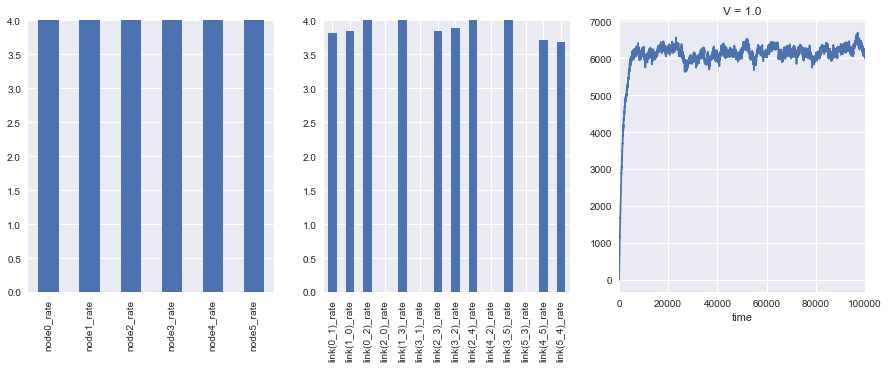

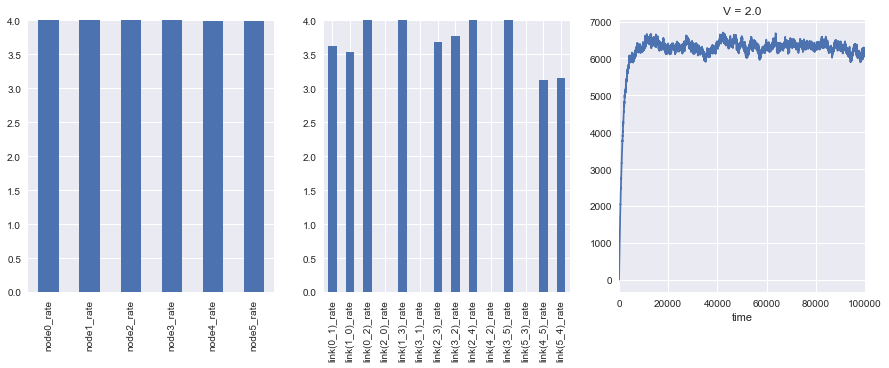

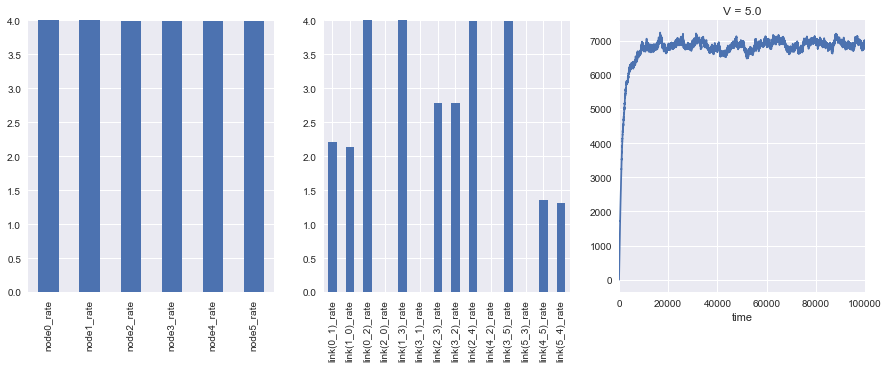

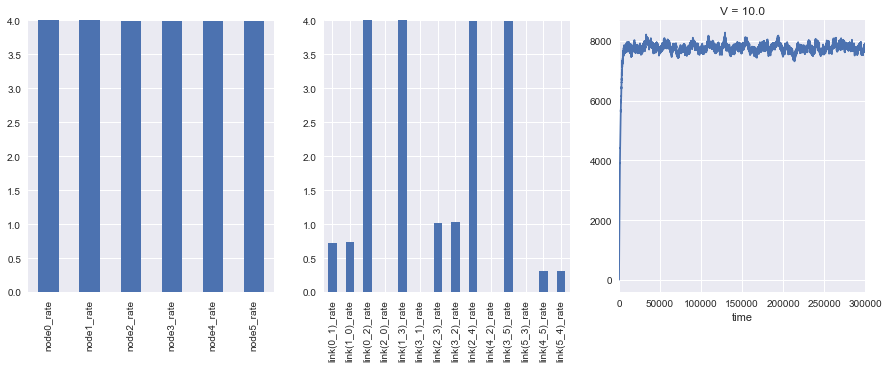

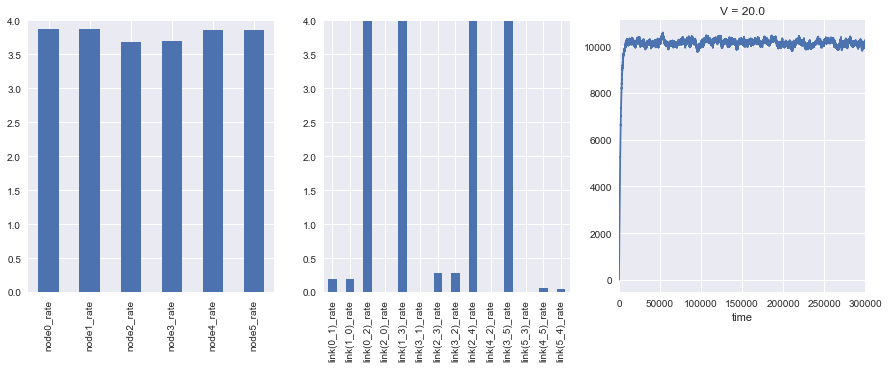

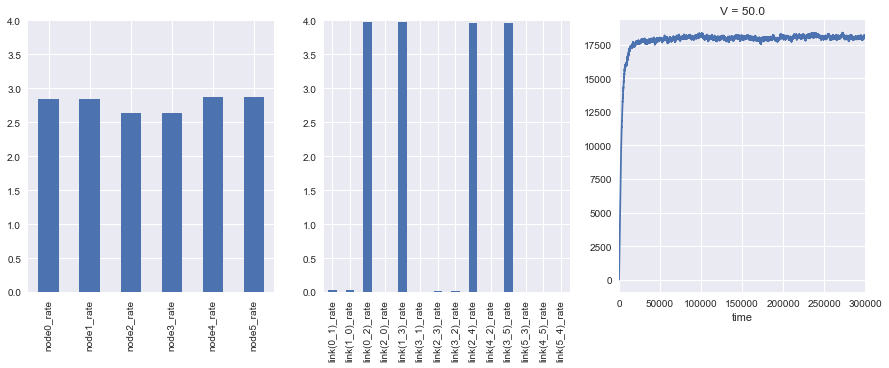

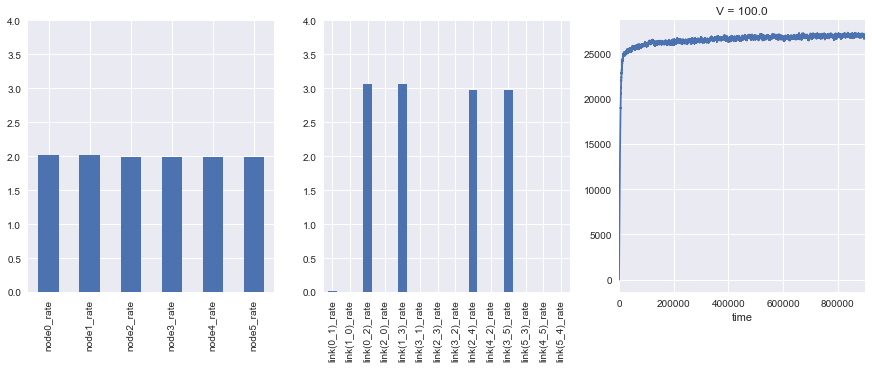

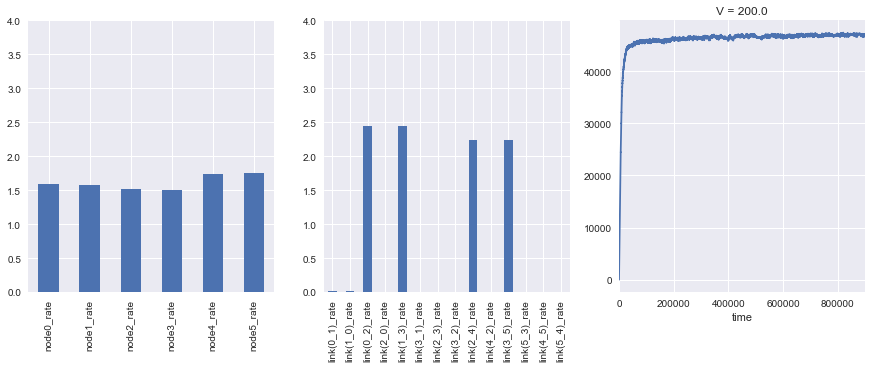

In [35]:
costs = []
queues = []
Vs = [1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0]
for V in Vs:
    t = int(100000 * (3**(np.floor(np.log10(V)))))
    print 'V = ', V, ', t = ', t
    schedule, queue, cost = test(N, t, deltar, policy, V)
    costs.append(cost.sum(axis=1).mean())
    queues.append(queue.sum(axis=1).mean())
    del schedule, queue, cost

#### Cost - Delay tradeoff with varying V

In the following figures, we show the mean costs and the mean total queue lengths with varying V.

From the figures below, we could observe the cost-delay tradeoff under various paramter V.

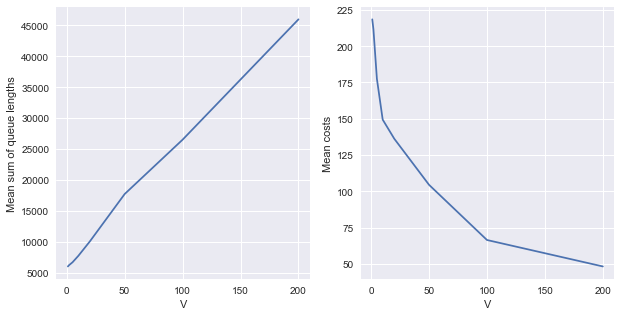

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(Vs, queues)
plt.xlabel('V')
plt.ylabel('Mean sum of queue lengths')
plt.subplot(1,2,2)
plt.plot(Vs, costs)
plt.xlabel('V')
plt.ylabel('Mean costs')

### Processing and transmission rate for each commodity

We now analyze the previous simulation results to check the (processing/transmission) rate of each commodity at different nodes/links.

For each node/link, commodity 0 (shown in gray color in the bar plots) indicates the time portion that the node/link is in reconfiguration.

In [11]:
def rate_plot(schedule, V):
    rates = pd.DataFrame()
    for n in xrange(N):
        node = schedule.columns[['node'+str(n) in x for x in schedule.columns]]
        df = schedule[node].copy()
        df.loc[df['node'+str(n)+'_reconfig'] > 0, 'node'+str(n)+'_packet'] = None
        df = df.fillna(0)
        df = (df.groupby('node'+str(n)+'_packet').sum() / df.shape[0])[['node'+str(n)+'_rate']]
        df.index.name = ''
        if rates.empty:
            rates = df
        else:
            rates = rates.join(df, how='outer')

    rates = rates.sort_index(ascending=False)
    rates = rates.stack()
    rates = rates.unstack(0)
    
    link_rates = pd.DataFrame()
    for l in schedule.columns[['link' in x and 'rate' in x for x in schedule.columns]].str.strip('_rate'):
        link = schedule.columns[[l in x for x in schedule.columns]]
        df = schedule[link].copy()
        df.loc[df[l+'_reconfig'] > 0, l+'_packet'] = None
        df = df.fillna(0)
        df = (df.groupby(l+'_packet').sum() / df.shape[0])[[l+'_rate']]
        if link_rates.empty:
            link_rates = df
        else:
            link_rates = link_rates.join(df, how='outer')

    link_rates = link_rates.sort_index(ascending=False)
    link_rates = link_rates.stack()
    link_rates = link_rates.unstack(0)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6));
    rates.plot(kind='bar', stacked=True, ylim=[0,4], ax=axes[0], colormap='nipy_spectral')
    axes[0].set_title('V = ' + str(V))
    link_rates.plot(kind='bar', stacked=True, ylim=[0,4], ax=axes[1], colormap='nipy_spectral')
    axes[1].set_title('V = ' + str(V))

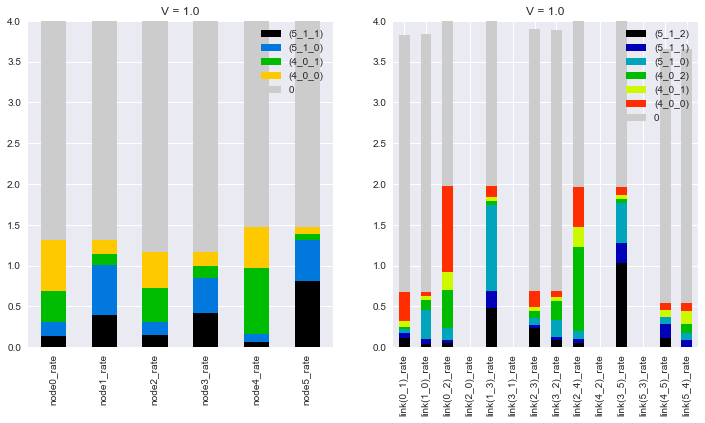

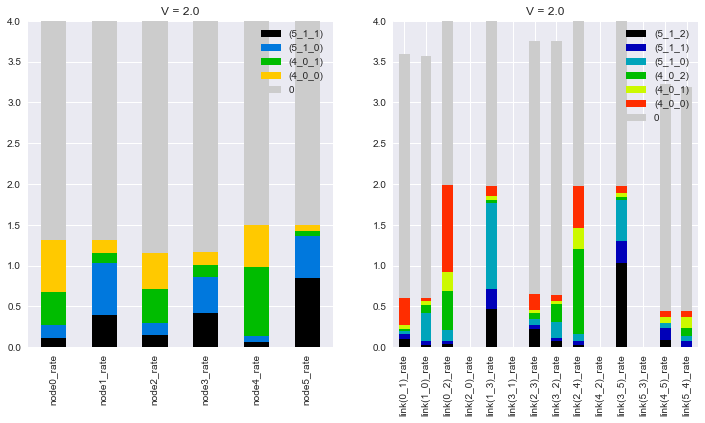

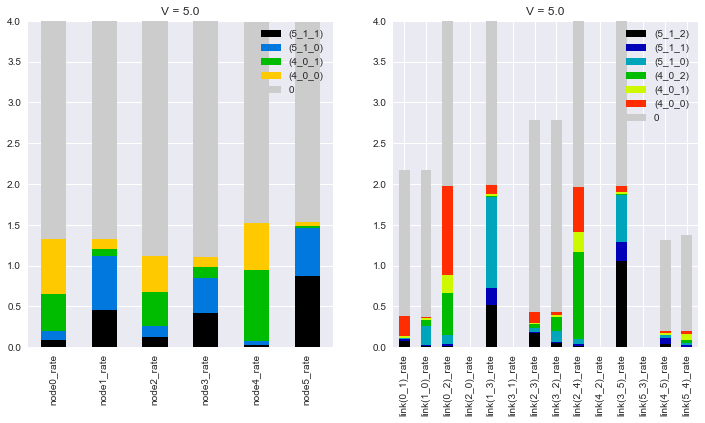

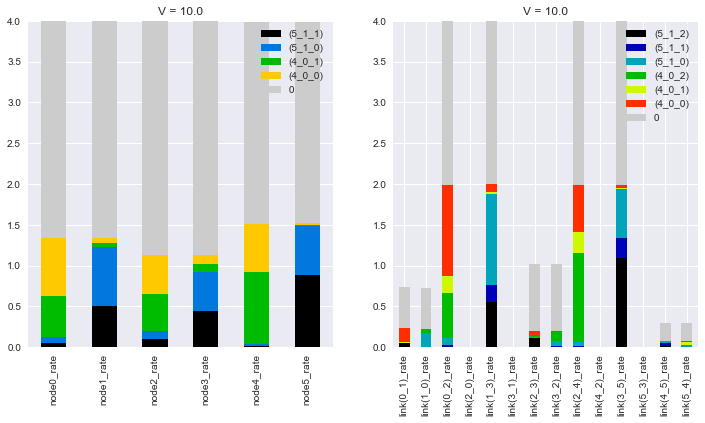

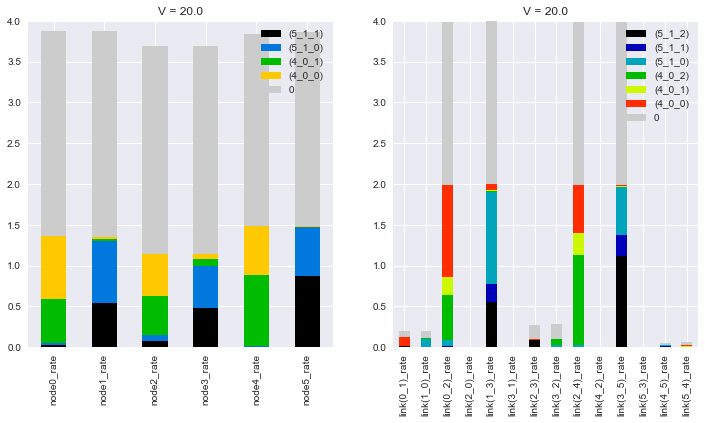

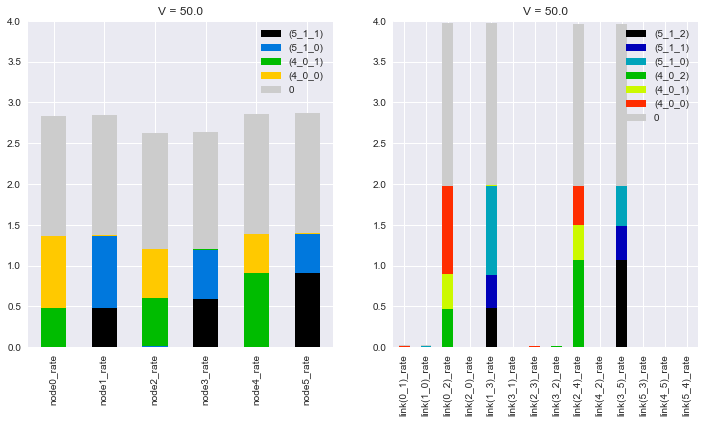

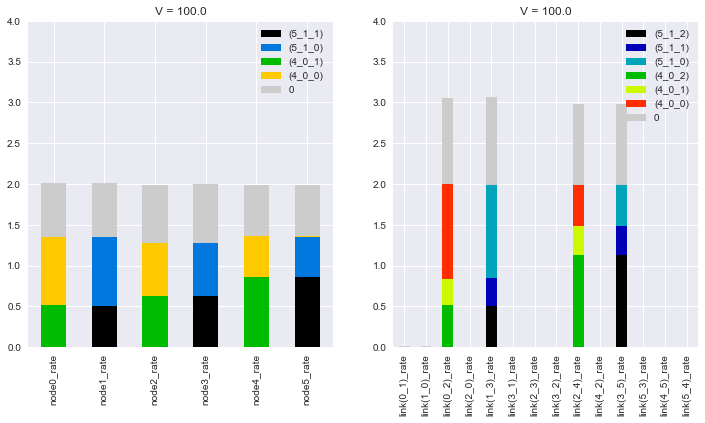

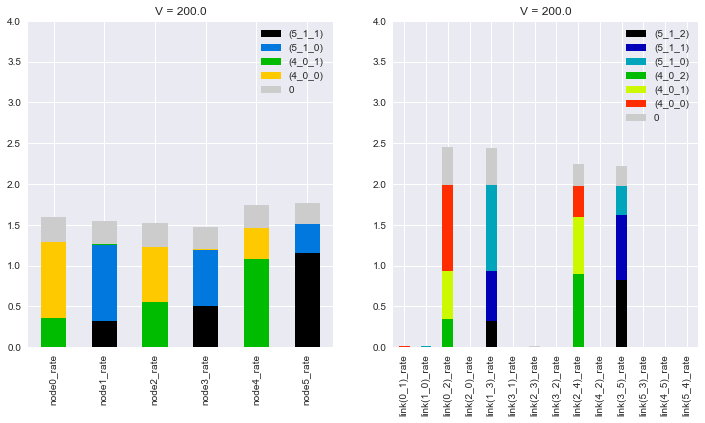

In [14]:
for V in Vs:
    t = int(100000 * (3**(np.floor(np.log10(V)))))
    output_dir = 'output/sim/'
    sim_command = './test t=' + str(t) + ' deltar=' + str(deltar) + ' policy=' + policy + ' V=' + str(V)
    sim_instance = 'N_' + str(N) + '_t_' + str(t) + '_deltar_' + str(deltar) + '_' + policy + '_V_' + str(V)
    schedule = pd.DataFrame.from_csv(output_dir + 'schedule_' + sim_instance + '.csv')
    #queue = pd.DataFrame.from_csv(output_dir + 'queue_' + sim_instance + '.csv')
    
    plt.figure()
    rate_plot(schedule, V)

In the bar plots above, the gray area indicate the portion when one resource is in reconfiguration. In other words, during these portion, the resource is allocated but is not processing/transmitting due to reconfiguration delay.

Comparing the results under different parameter V, we may observe that larger V parameter induces less variation in the route selection and the NFV location, and in turn reduces the overhead wasted to reconfiguration. However, this is at the expense of larger queue length (delay), as indicated in the cost-delay tradeoff shown above.

## DCNC with various parameter V

In [21]:
N = 6
t = 100000
deltar = 10
policy = 'DCNC'
V = 1.0

V =  1.0
Mean queue length sum =  218383.400589
Mean cost =  224.190444444
V =  5.0
Mean queue length sum =  218026.563467
Mean cost =  224.112311111
V =  10.0
Mean queue length sum =  219002.2594
Mean cost =  224.128
V =  50.0
Mean queue length sum =  218428.612122
Mean cost =  218.942666667
V =  100.0
Mean queue length sum =  218915.731778
Mean cost =  209.563166667


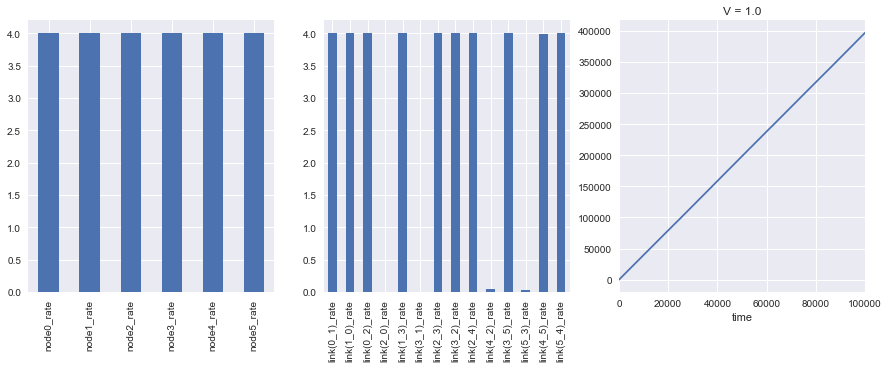

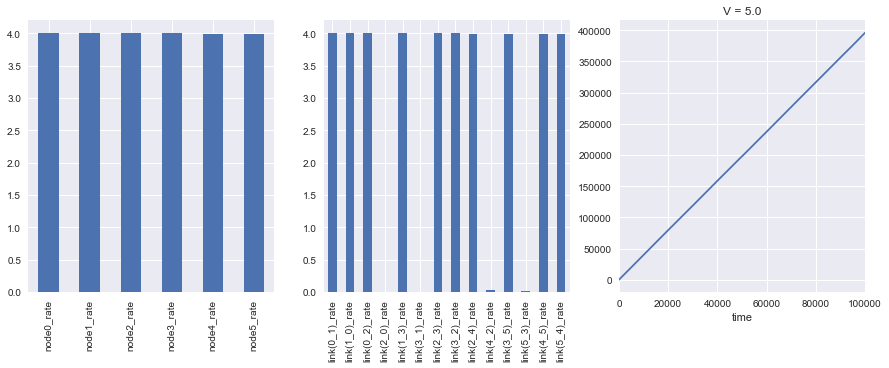

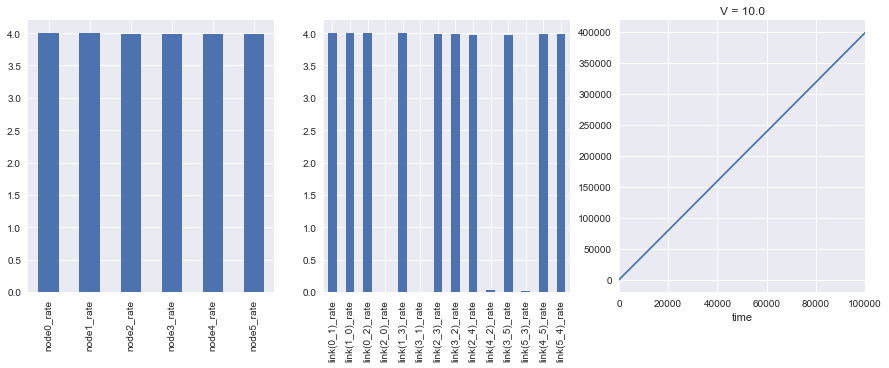

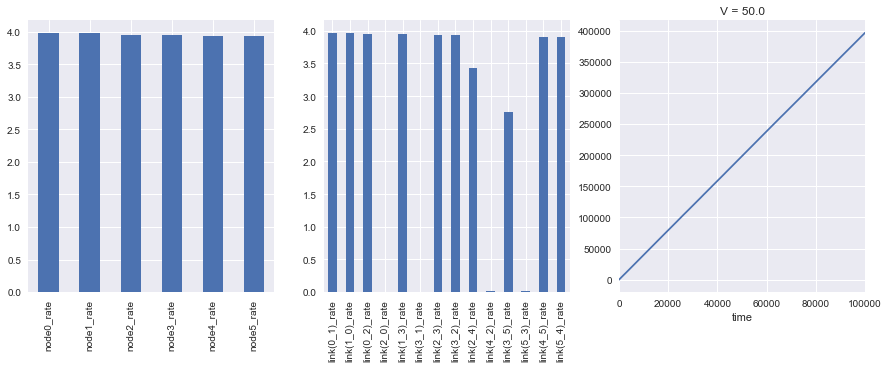

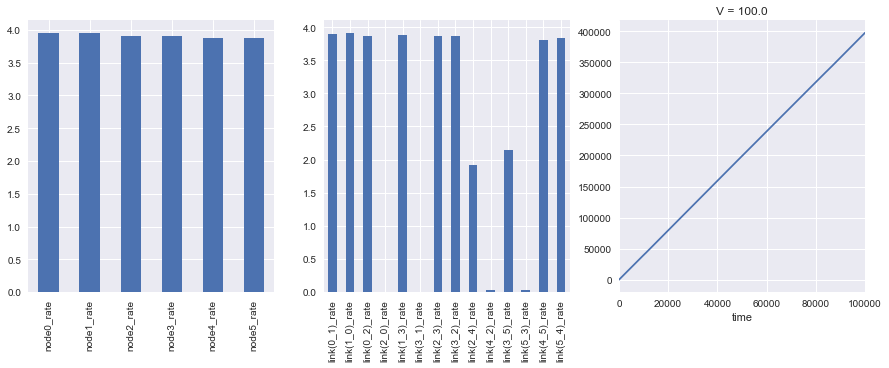

In [22]:
costs = []
queues = []
Vs = [1.0, 5.0, 10.0, 50.0, 100.0]
for V in Vs:
    print 'V = ', V
    schedule, queue, cost = test(N, t, deltar, policy, V)
    costs.append(cost.sum(axis=1).mean())
    queues.append(queue.sum(axis=1).mean())
    del schedule, queue, cost

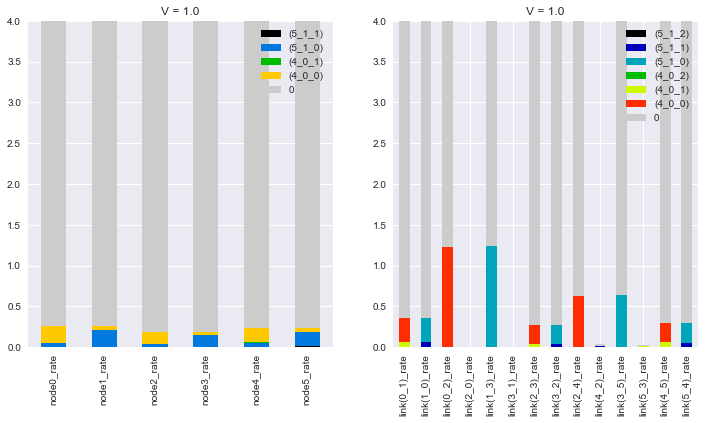

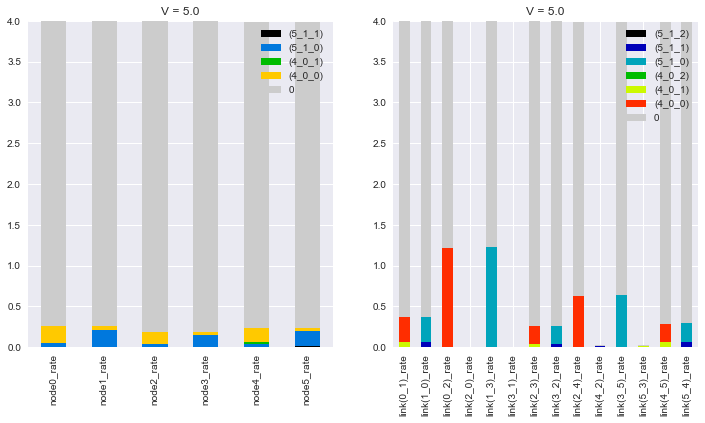

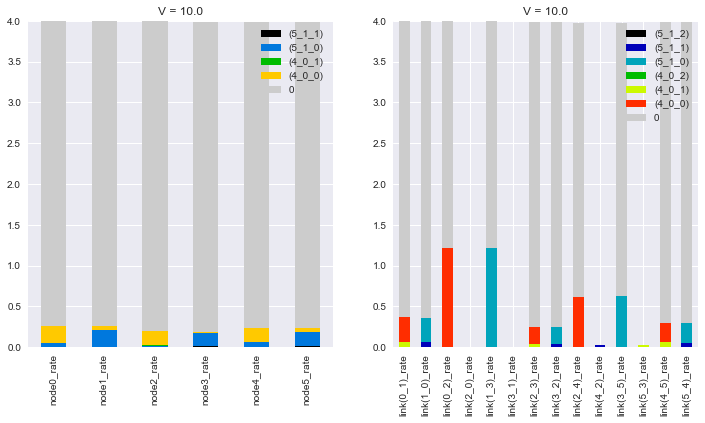

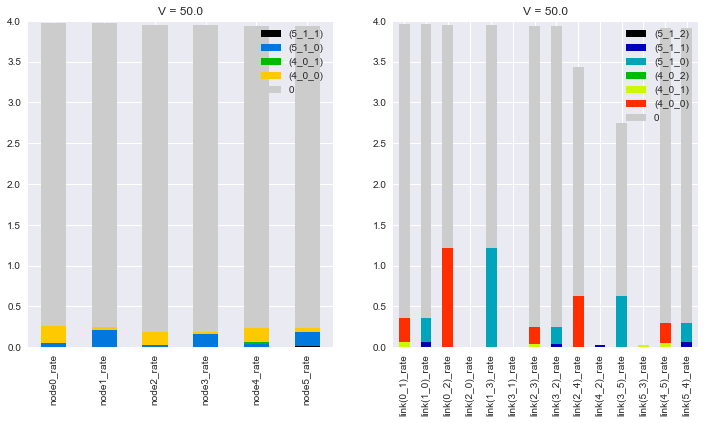

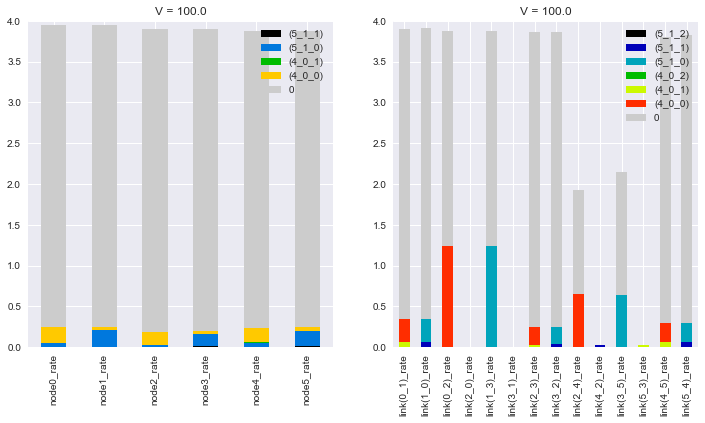

In [23]:
for V in Vs:
    output_dir = 'output/sim/'
    sim_command = './test t=' + str(t) + ' deltar=' + str(deltar) + ' policy=' + policy + ' V=' + str(V)
    sim_instance = 'N_' + str(N) + '_t_' + str(t) + '_deltar_' + str(deltar) + '_' + policy + '_V_' + str(V)
    schedule = pd.DataFrame.from_csv(output_dir + 'schedule_' + sim_instance + '.csv')
    #queue = pd.DataFrame.from_csv(output_dir + 'queue_' + sim_instance + '.csv')
    
    plt.figure()
    rate_plot(schedule, V)

## Comparison with DCNC under no reconfiguration delay

Reconfiguration delay $\Delta_r = 0$

In [24]:
N = 6
t = 100000
deltar = 0
policy = 'DCNC'
V = 1.0

V =  1.0
Mean queue length sum =  287.902811111
Mean cost =  190.722833333
V =  5.0
Mean queue length sum =  1160.38832222
Mean cost =  38.2032444444
V =  10.0
Mean queue length sum =  2273.16604444
Mean cost =  37.9792777778
V =  50.0
Mean queue length sum =  10021.8512556
Mean cost =  37.8277333333
V =  100.0
Mean queue length sum =  19552.1407111
Mean cost =  37.9407555556


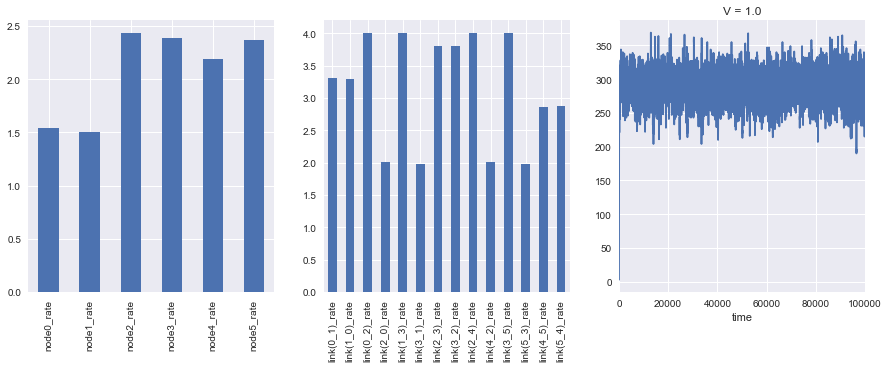

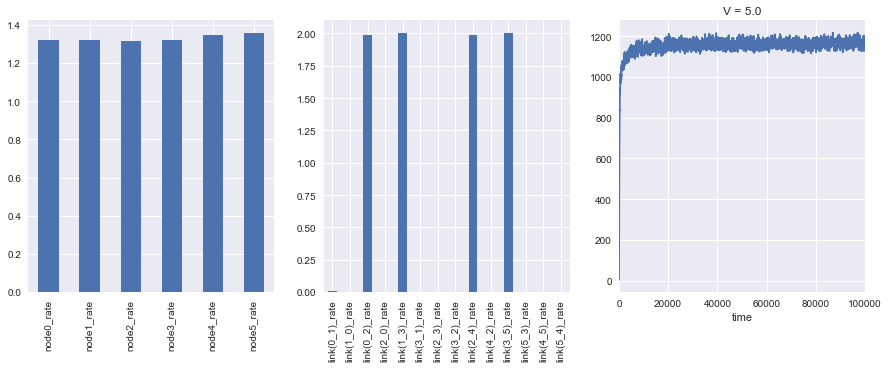

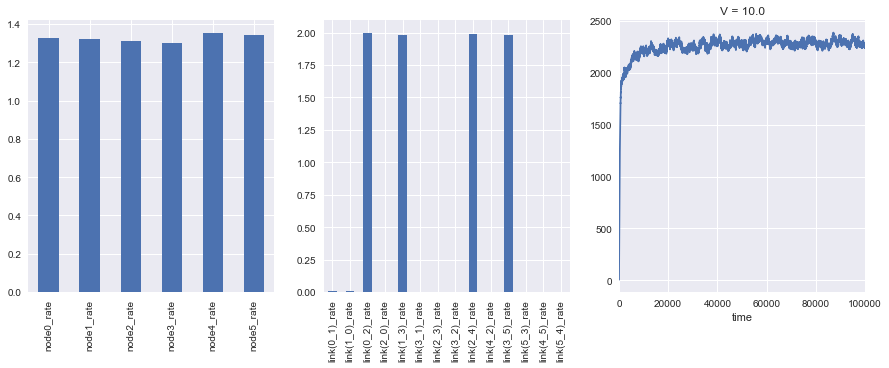

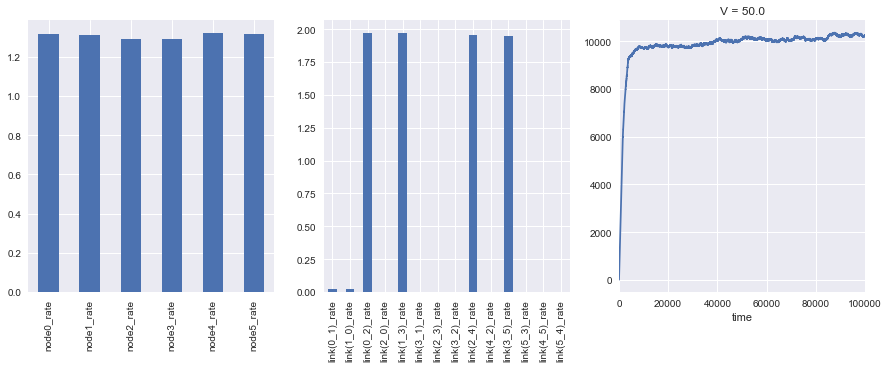

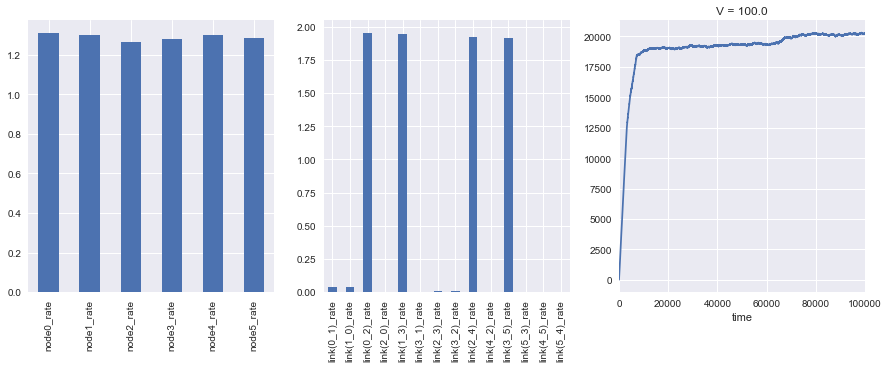

In [25]:
costs = []
queues = []
Vs = [1.0, 5.0, 10.0, 50.0, 100.0]
for V in Vs:
    print 'V = ', V
    schedule, queue, cost = test(N, t, deltar, policy, V)
    costs.append(cost.sum(axis=1).mean())
    queues.append(queue.sum(axis=1).mean())
    del schedule, queue, cost

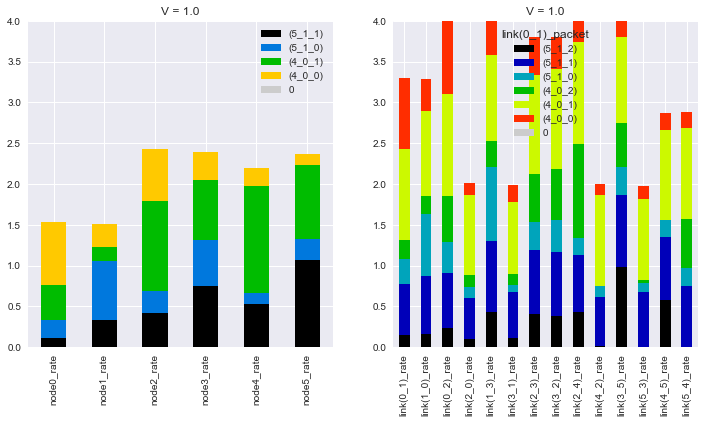

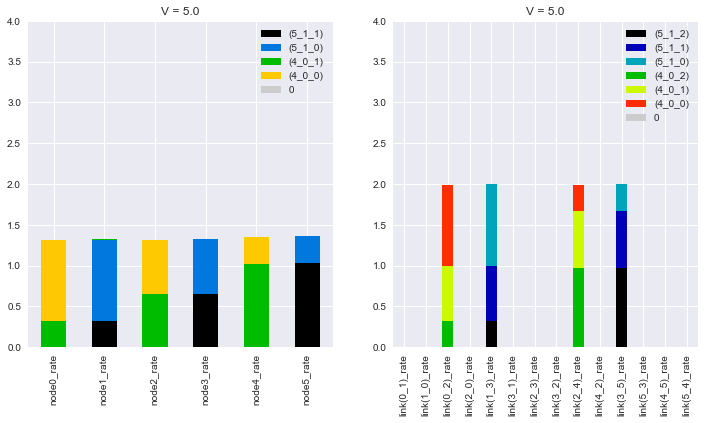

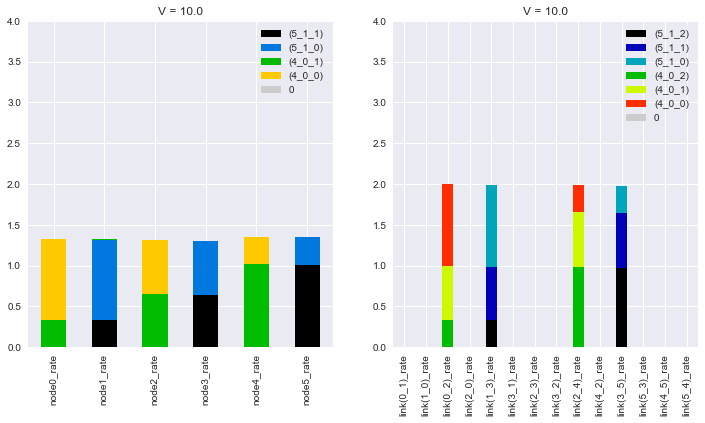

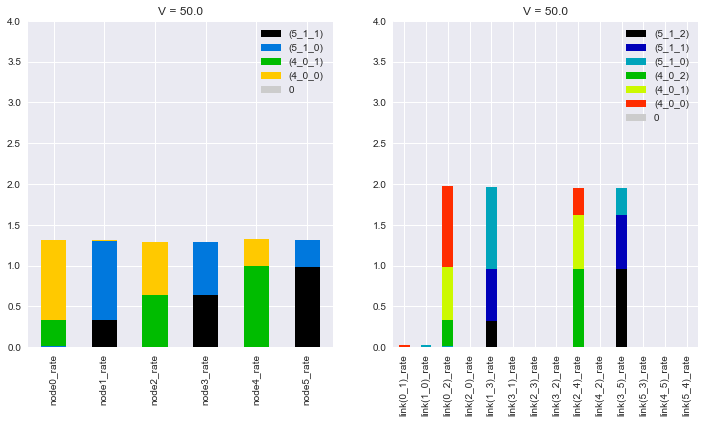

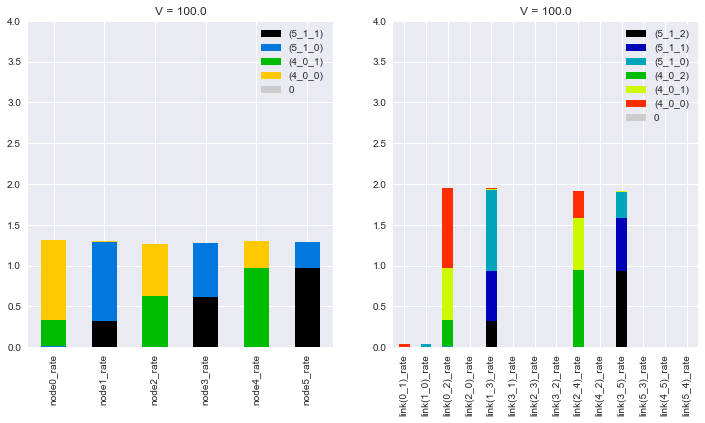

In [27]:
for V in Vs:
    output_dir = 'output/sim/'
    sim_command = './test t=' + str(t) + ' deltar=' + str(deltar) + ' policy=' + policy + ' V=' + str(V)
    sim_instance = 'N_' + str(N) + '_t_' + str(t) + '_deltar_' + str(deltar) + '_' + policy + '_V_' + str(V)
    schedule = pd.DataFrame.from_csv(output_dir + 'schedule_' + sim_instance + '.csv')
    #queue = pd.DataFrame.from_csv(output_dir + 'queue_' + sim_instance + '.csv')
    
    plt.figure()
    rate_plot(schedule, V)